# 03实现简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

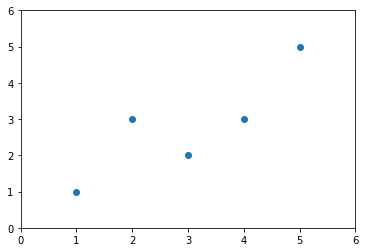

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [7]:
print(zip(x,y))

In [8]:
num = 0.0
d = 0.0
for x_i,y_i in zip(x,y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [9]:
a = num/d
b = y_mean - a * x_mean

In [10]:
y_hat = a * x + b

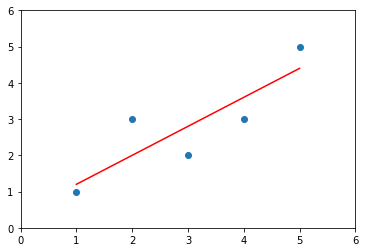

In [11]:
plt.scatter(x,y)
plt.plot(x,y_hat,color='r')
plt.axis([0,6,0,6])
plt.show()

In [12]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

In [25]:
from SimpleLinearRegression import SimpleLinearRegression1

reg1 = SimpleLinearRegression1()
reg1.fit(x,y)
reg1.predict(np.array([x_predict]))

array([5.2])

In [14]:
reg1.a_

0.8

In [15]:
reg1.b_

0.39999999999999947

In [16]:
y_hat1 = reg1.predict(x)

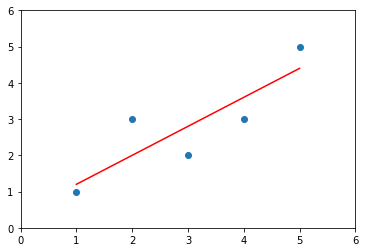

In [17]:
plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

# 向量化实现

In [31]:
from SimpleLinearRegression import SimpleLinearRegression1



In [32]:
reg1 = SimpleLinearRegression1()
reg1.fit(x,y)
reg1.predict(np.array([x_predict]))

array([5.2])

# 05 衡量回归算法的标准，MSE vs MAE

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
x = boston.data[:,5]

In [8]:
x.shape

(506,)

In [9]:
y = boston.target

In [10]:
y.shape

(506,)

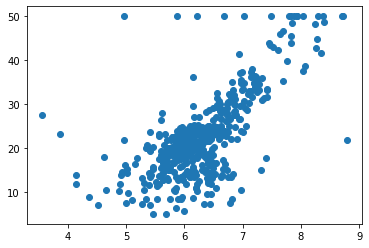

In [11]:
plt.scatter(x,y)
plt.show()

In [12]:
np.max(y)

50.0

In [13]:
x = x[y<50]
y = y[y<50]

In [14]:
x.shape

(490,)

In [15]:
y.shape

(490,)

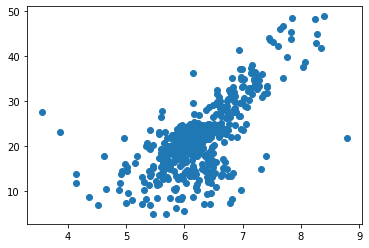

In [16]:
plt.scatter(x,y)
plt.show()

# 使用简单的线性回归法

In [17]:
from model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,seed=666)

In [21]:
x_train.shape

(392,)

In [22]:
y_train.shape

(392,)

In [23]:
x_test.shape

(98,)

In [24]:
y_test.shape

(98,)

In [25]:
from SimpleLinearRegression import SimpleLinearRegression1

In [26]:
reg = SimpleLinearRegression1()
reg.fit(x_train,y_train)

SimpleLinearRegression1()

In [27]:
reg.a_

7.8608543562689555

In [28]:
reg.b_

-27.459342806705543

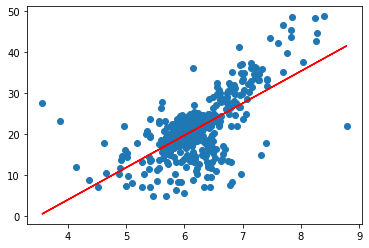

In [29]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='r')
plt.show()

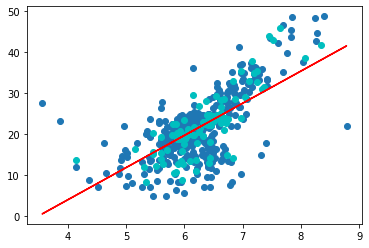

In [31]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color='c')
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [32]:
y_predict = reg.predict(x_test)

# MSE

In [34]:
mse_test = np.sum((y_predict - y_test)**2)/len(y_test)
mse_test

24.156602134387438

# RMSE

In [35]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

# MAE

In [36]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

3.5430974409463873

In [37]:
from metrics import mean_absolute_error
from metrics import root_mean_squared_error
from metrics import mean_absolute_error

In [38]:
mean_absolute_error(y_test,y_predict)

3.5430974409463873

In [39]:
root_mean_squared_error(y_test,y_predict)

4.914936635846635

In [40]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

# scikit-learn中的MSE和MAE

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(y_test,y_predict)

24.156602134387438

In [43]:
mean_absolute_error(y_test,y_predict)

3.5430974409463873

# R Square

In [44]:
1 - mean_squared_error(y_test,y_predict) / np.var(y_test)

0.6129316803937322

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6129316803937324

# 08 实现我们自己的 Linear Regression

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [49]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [50]:
X.shape

(490, 13)

In [51]:
from model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, seed=666)

# 使用自己制作的Linear Regression

In [55]:
from LinearRegression import LinearRegression

reg = LinearRegression()
reg.fit_normal(X_train,y_train)

ImportError: attempted relative import with no known parent package

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [57]:
lin_reg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [58]:
lin_reg.intercept_

34.117399723229845

In [59]:
lin_reg.score(X_test,y_test)

0.8129794056212809

# KNN Regressor

In [60]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train,y_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_standard,y_train)
knn_reg.score(X_test_standard,y_test)

0.847923904906593

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1,6)]
    }
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, n_jobs=-1, verbose=1)
grid_search.fit(X_train_standard, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.0s finished


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=1)

In [63]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [64]:
grid_search.best_score_

0.8121986929882669